In [27]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import  train_test_split as tts
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression

# Load and analysis of Data

In [2]:
df = pd.read_excel("insurance.xlsx")

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [7]:
x = df.drop("charges", axis=1)
x.head()

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest


In [8]:
y = df[["charges"]]
y.head()

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520


In [9]:
xtrain, xtest, ytrain, ytest = tts(x,y, test_size=0.3, random_state=150)

# Using Label Encoding

In [10]:
xtrain_le = xtrain.copy()
xtest_le = xtest.copy()

In [11]:
le = LabelEncoder()

In [12]:
xtrain_le['sex'] = le.fit_transform(xtrain_le['sex'])
xtrain_le['smoker'] = le.fit_transform(xtrain_le['smoker'])
xtrain_le['region'] = le.fit_transform(xtrain_le['region'])
xtest_le['sex'] = le.fit_transform(xtest_le['sex'])
xtest_le['smoker'] = le.fit_transform(xtest_le['smoker'])
xtest_le['region'] = le.fit_transform(xtest_le['region'])

In [13]:
xtrain_le.head()

,age,sex,bmi,children,smoker,region
631,24,1,29.300,0,0,3
1243,28,0,33.110,0,0,2
205,28,0,28.880,1,0,0
558,35,0,34.105,3,1,1
657,27,1,33.155,2,0,1


In [14]:
xtest_le.head()

,age,sex,bmi,children,smoker,region
1009,51,1,27.74,1,0,0
545,49,1,25.84,2,1,1
69,28,1,23.98,3,1,2
778,35,1,34.32,3,0,2
870,50,1,36.20,0,0,3


## Linear Regression

In [15]:
lr_le = LinearRegression()
lr_le.fit(xtrain_le, ytrain)

LinearRegression()

In [16]:
lr_le_acc = lr_le.score(xtest_le, ytest)
lr_le_acc

0.7403639858843116

In [18]:
pred0 = lr_le.predict(xtest_le)

In [19]:
lr_le_mse = mean_squared_error(ytest, pred0)
lr_le_mse

39977903.627006955

In [20]:
lr_le_mae = mean_absolute_error(ytest, pred0)
lr_le_mae

4303.0272714659095

## KNN Regressor

In [48]:
knn_le = KNeighborsRegressor()
knn_le.fit(xtrain_le, ytrain)

KNeighborsRegressor()

In [49]:
knn_le_acc = knn_le.score(xtest_le, ytest)
knn_le_acc

0.05039412128321452

In [50]:
pred1 = knn_le.predict(xtest_le)

In [51]:
knn_le_mse = mean_squared_error(ytest, pred1)
knn_le_mse

146217205.00632578

In [53]:
knn_le_mae = mean_absolute_error(ytest, pred1)
knn_le_mae

8503.948398556717

# Using One Hot Encoding

In [33]:
xtrain_h = xtrain.copy()
xtest_h = xtest.copy()

In [39]:
xtrain_h = pd.get_dummies(xtrain_h, drop_first=True)
xtest_h = pd.get_dummies(xtest_h, drop_first=True)

In [35]:
xtrain_h.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
631,24,29.300,0,True,False,False,False,True
1243,28,33.110,0,False,False,False,True,False
205,28,28.880,1,False,False,False,False,False
558,35,34.105,3,False,True,True,False,False
657,27,33.155,2,True,False,True,False,False


In [40]:
xtest_h.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
1009,51,27.74,1,True,False,False,False,False
545,49,25.84,2,True,True,True,False,False
69,28,23.98,3,True,True,False,True,False
778,35,34.32,3,True,False,False,True,False
870,50,36.20,0,True,False,False,False,True


## Linear Regression

In [41]:
lr_h = LinearRegression()
lr_h.fit(xtrain_h, ytrain)

LinearRegression()

In [42]:
lr_h_acc = lr_h.score(xtest_h, ytest)
lr_h_acc

0.7390731474828374

In [43]:
pred2 = lr_h.predict(xtest_h)

In [44]:
lr_h_mse = mean_squared_error(ytest, pred2)
lr_h_mse

40176662.69896368

In [45]:
lr_h_mae = mean_absolute_error(ytest, pred2)
lr_h_mae

4324.440517143002

## KNN Regressor

In [55]:
knn_h = KNeighborsRegressor()
knn_h.fit(xtrain_h, ytrain)

KNeighborsRegressor()

In [56]:
knn_h_acc = knn_h.score(xtest_h, ytest)
knn_h_acc

0.11979718548633078

In [57]:
pred3 = knn_h.predict(xtest_h)

In [58]:
knn_h_mse = mean_squared_error(ytest, pred3)
knn_h_mse

135530748.34667742

In [59]:
knn_h_mae = mean_absolute_error(ytest, pred3)
knn_h_mae

8104.236907342786

# Comparison

### Accuracy

In [64]:
data = {
    'Regressor': ['Linear Regression\nLabel Encoding', 'Linear Regression\nOneHot Encoding', 'KNN Regression\nLabel Encoding', 'KNN Regression\nOneHot Encoding'],
    'Accuracy': [lr_le_acc, lr_h_acc, knn_le_acc, knn_h_acc]
}
data = pd.DataFrame(data=data)

<Axes: xlabel='Regressor', ylabel='Accuracy'>

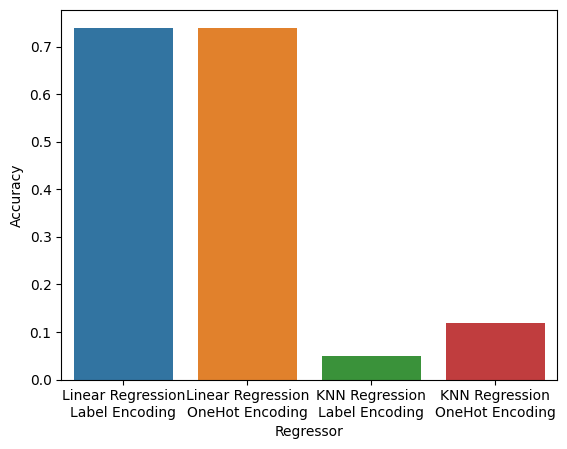

In [65]:
sns.barplot(x='Regressor',y='Accuracy',data=data)

### MSE

In [66]:
data = {
    'Regressor': ['Linear Regression\nLabel Encoding', 'Linear Regression\nOneHot Encoding', 'KNN Regression\nLabel Encoding', 'KNN Regression\nOneHot Encoding'],
    'MSE': [lr_le_mse, lr_h_mse, knn_le_mse, knn_h_mse]
}
data = pd.DataFrame(data=data)

<Axes: xlabel='Regressor', ylabel='MSE'>

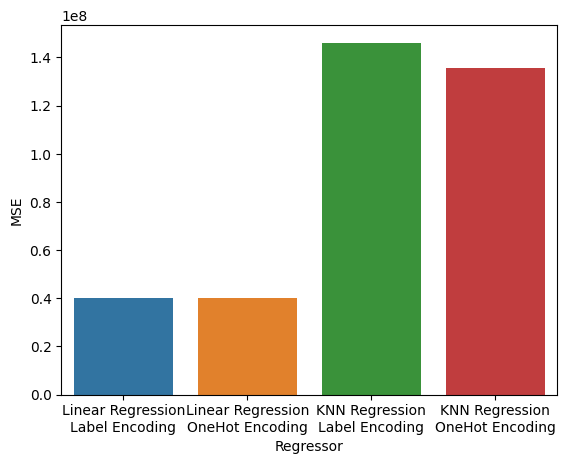

In [67]:
sns.barplot(x='Regressor',y='MSE',data=data)

### MAE

In [68]:
data = {
    'Regressor': ['Linear Regression\nLabel Encoding', 'Linear Regression\nOneHot Encoding', 'KNN Regression\nLabel Encoding', 'KNN Regression\nOneHot Encoding'],
    'MAE': [lr_le_mae, lr_h_mae, knn_le_mae, knn_h_mae]
}
data = pd.DataFrame(data=data)

<Axes: xlabel='Regressor', ylabel='MAE'>

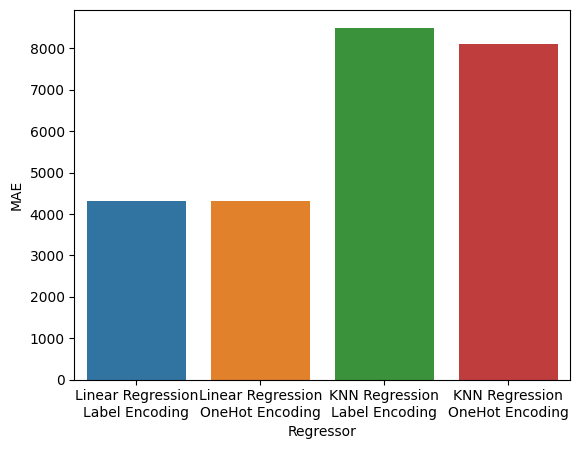

In [72]:
sns.barplot(x='Regressor',y='MAE',data=data)